<a href="https://colab.research.google.com/github/manan-garg/Credit_Line_Decision_Expert/blob/main/Credit_Line_Decision_Expert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem Statement:

Identify if an individual be given loan or not based on the different parameters. Also, suggest the repayment terms in the form of business recommendations.

In [ ]:
# Importing libraries -
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading the dataset -
df = pd.read_csv(r'logistic_regression.csv')
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [ ]:
# extracting month and year from datetime columns
df['issue_d_month']=(pd.to_datetime(df['issue_d'])).dt.month
df['issue_d_year']=(pd.to_datetime(df['issue_d'])).dt.year
df['earliest_cr_line_month']=(pd.to_datetime(df['earliest_cr_line'])).dt.month
df['earliest_cr_line_year']=(pd.to_datetime(df['earliest_cr_line'])).dt.year
df.drop(['issue_d','earliest_cr_line'], axis=1, inplace=True)

### Basic Metrics

In [ ]:
# Shape of the dataset -
df.shape

(396030, 29)

In [ ]:
# basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 29 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   loan_amnt               396030 non-null  float64
 1   term                    396030 non-null  object 
 2   int_rate                396030 non-null  float64
 3   installment             396030 non-null  float64
 4   grade                   396030 non-null  object 
 5   sub_grade               396030 non-null  object 
 6   emp_title               373103 non-null  object 
 7   emp_length              377729 non-null  object 
 8   home_ownership          396030 non-null  object 
 9   annual_inc              396030 non-null  float64
 10  verification_status     396030 non-null  object 
 11  loan_status             396030 non-null  object 
 12  purpose                 396030 non-null  object 
 13  title                   394275 non-null  object 
 14  dti                 

In [ ]:
# Number of unique values in each column
df.nunique()

loan_amnt                   1397
term                           2
int_rate                     566
installment                55706
grade                          7
sub_grade                     35
emp_title                 173105
emp_length                    11
home_ownership                 6
annual_inc                 27197
verification_status            3
loan_status                    2
purpose                       14
title                      48817
dti                         4262
open_acc                      61
pub_rec                       20
revol_bal                  55622
revol_util                  1226
total_acc                    118
initial_list_status            2
application_type               3
mort_acc                      33
pub_rec_bankruptcies           9
address                   393700
issue_d_month                 12
issue_d_year                  10
earliest_cr_line_month        12
earliest_cr_line_year         65
dtype: int64

From the above observation, we can conclude that term, grade, sub_grade, emp_length, home_ownership, verification_status, loan_status, purpose, initial_list_status, application_type, issue_d_month and earliest_cr_line_month can be considered as Categorical.

In [ ]:
# Creating a copy of the dataframe for fututre analysis -
df_copy=df.copy()

In [ ]:
# changing categorical columns to category type
for i in ['term','grade','sub_grade','emp_length','home_ownership','verification_status','loan_status','purpose','initial_list_status','application_type','issue_d_month','earliest_cr_line_month']:
    df[i]=df[i].astype("category")

In [ ]:
# Checking data types -
df.dtypes

loan_amnt                  float64
term                      category
int_rate                   float64
installment                float64
grade                     category
sub_grade                 category
emp_title                   object
emp_length                category
home_ownership            category
annual_inc                 float64
verification_status       category
loan_status               category
purpose                   category
title                       object
dti                        float64
open_acc                   float64
pub_rec                    float64
revol_bal                  float64
revol_util                 float64
total_acc                  float64
initial_list_status       category
application_type          category
mort_acc                   float64
pub_rec_bankruptcies       float64
address                     object
issue_d_month             category
issue_d_year                 int64
earliest_cr_line_month    category
earliest_cr_line_yea

In [ ]:
# variables to store all the numerical and categorical columns
df_continuous_columns = df.select_dtypes(include='number').columns
df_categorical_columns = ['term','grade','sub_grade','emp_length','home_ownership','verification_status','loan_status','purpose','initial_list_status','application_type','issue_d_month','earliest_cr_line_month']

In [ ]:
#statistical summary
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,issue_d_year,earliest_cr_line_year
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000,396030.000000,396030.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648,2013.629074,1997.857667
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174,1.481725,7.198387
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,2007.000000,1944.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000,2013.000000,1994.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000,2014.000000,1999.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000,2015.000000,2003.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000,2016.000000,2013.000000


In [ ]:
#Checking which columns have null values
df.isnull().sum()

loan_amnt                     0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                 22927
emp_length                18301
home_ownership                0
annual_inc                    0
verification_status           0
loan_status                   0
purpose                       0
title                      1755
dti                           0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                  276
total_acc                     0
initial_list_status           0
application_type              0
mort_acc                  37795
pub_rec_bankruptcies        535
address                       0
issue_d_month                 0
issue_d_year                  0
earliest_cr_line_month        0
earliest_cr_line_year         0
dtype: int64

There are null values in the columns emp_title, emp_length, title, revol_util, mort_acc and pub_rec_bankruptcies.

### Non-Graphical Analysis

#### Checking value counts for categorical columns -

In [ ]:
for i in df_categorical_columns:
    print(i)
    print(df[i].value_counts())
    print('\n')

term
 36 months    302005
 60 months     94025
Name: term, dtype: int64


grade
B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: grade, dtype: int64


sub_grade
B3    26655
B4    25601
C1    23662
C2    22580
B2    22495
B5    22085
C3    21221
C4    20280
B1    19182
A5    18526
C5    18244
D1    15993
A4    15789
D2    13951
D3    12223
D4    11657
A3    10576
A1     9729
D5     9700
A2     9567
E1     7917
E2     7431
E3     6207
E4     5361
E5     4572
F1     3536
F2     2766
F3     2286
F4     1787
F5     1397
G1     1058
G2      754
G3      552
G4      374
G5      316
Name: sub_grade, dtype: int64


emp_length
10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64


home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER     

**Observations**

1) Majority of the people have loan term of 36 months.

2) Most common loan grade and subgrade assigned by Loantap is Grade B and subgrade B3 respectively.

3) Commonly dataset holds information of the people with work experience of more than 10 months.

4) On an average people owns home based out of mortgage loan.

5) Majority of the peoples income and its source is verified by Loantap.

6) The dataset has more number of rows for the people who have fully paid the loan.

7) 'debt_consolidation' is the most common category provided as purpose by people while applying for loan.

8) Mostly individual people apply for loan rather than jointly.

9) Majority of the loans are issued in the month of October.

### Visual Analysis

#### Univariate Analysis - Continuous Variables

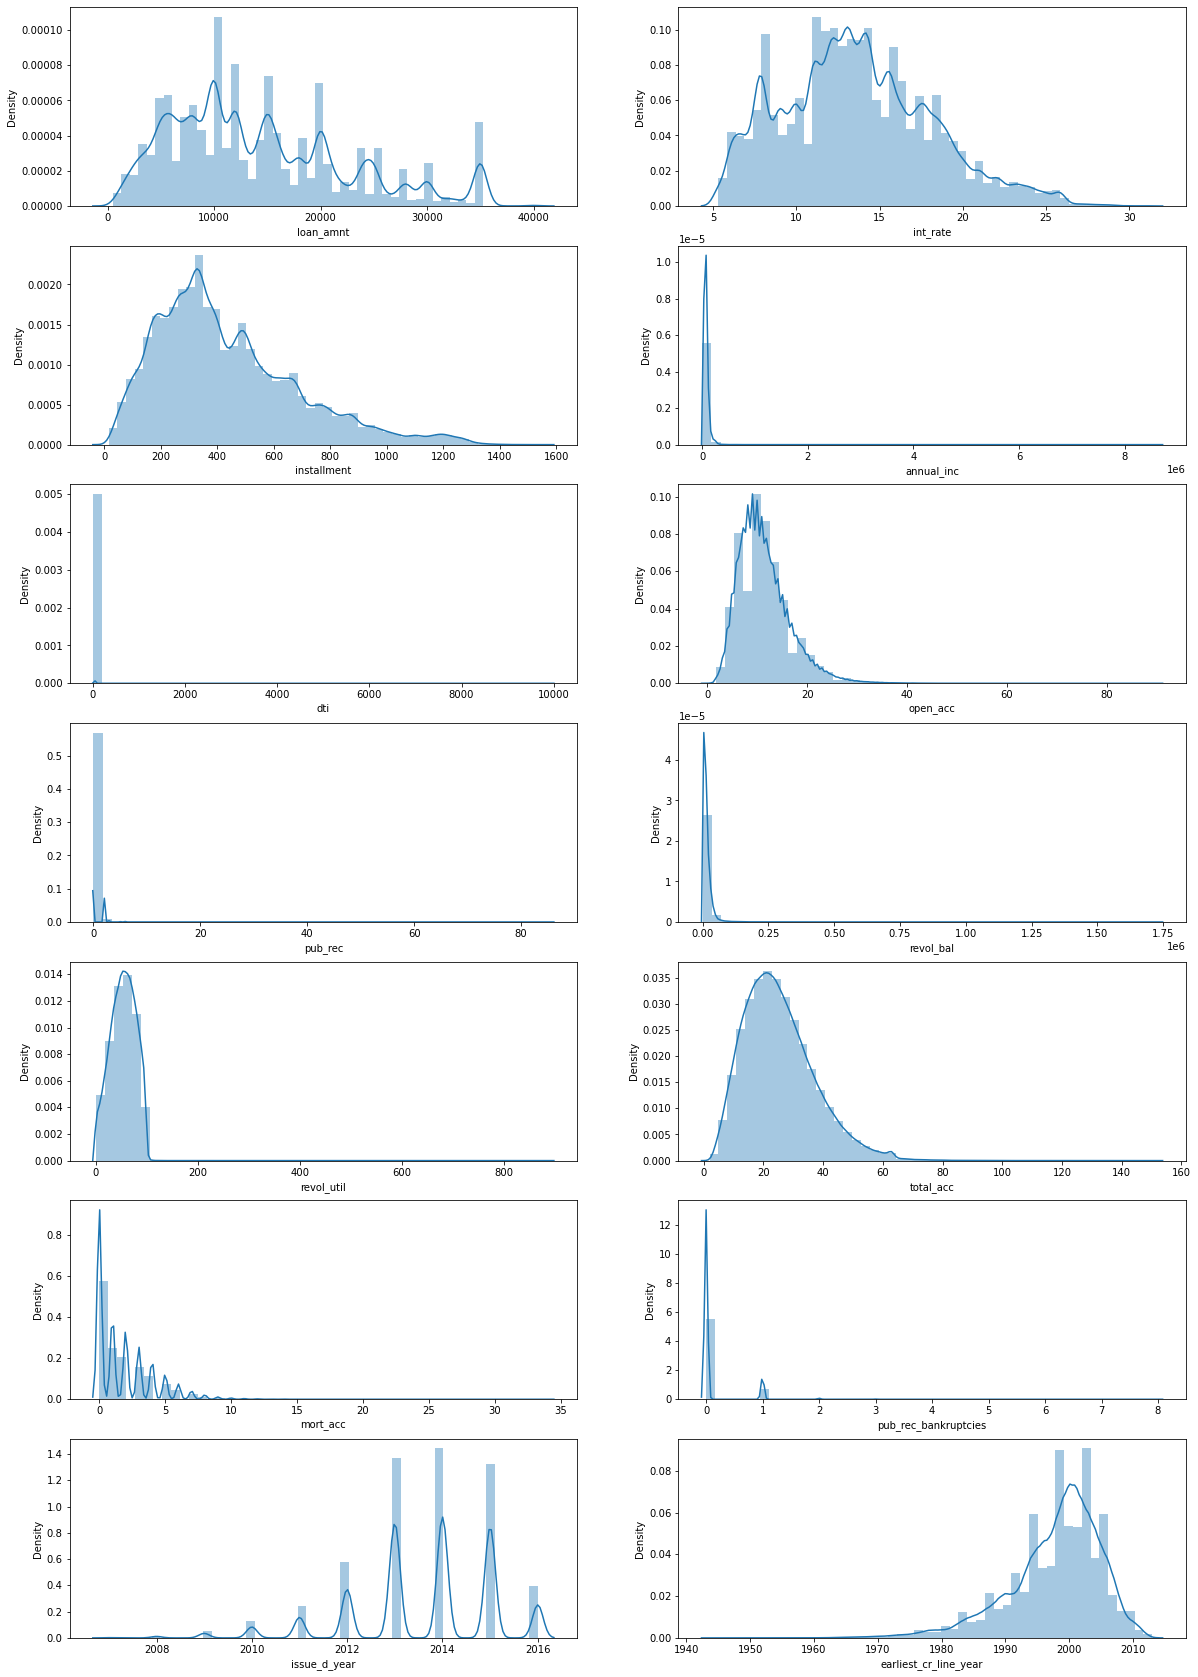

In [ ]:
#distplot for Continuous Variables
fig,axes =plt.subplots(7,2,figsize=(20, 30))
cols=df_continuous_columns
for x in range(len(cols)):
    p=sns.distplot(df[cols[x]],ax=axes[x//2,x%2])

#### Univariate Analysis - Categorical Variables

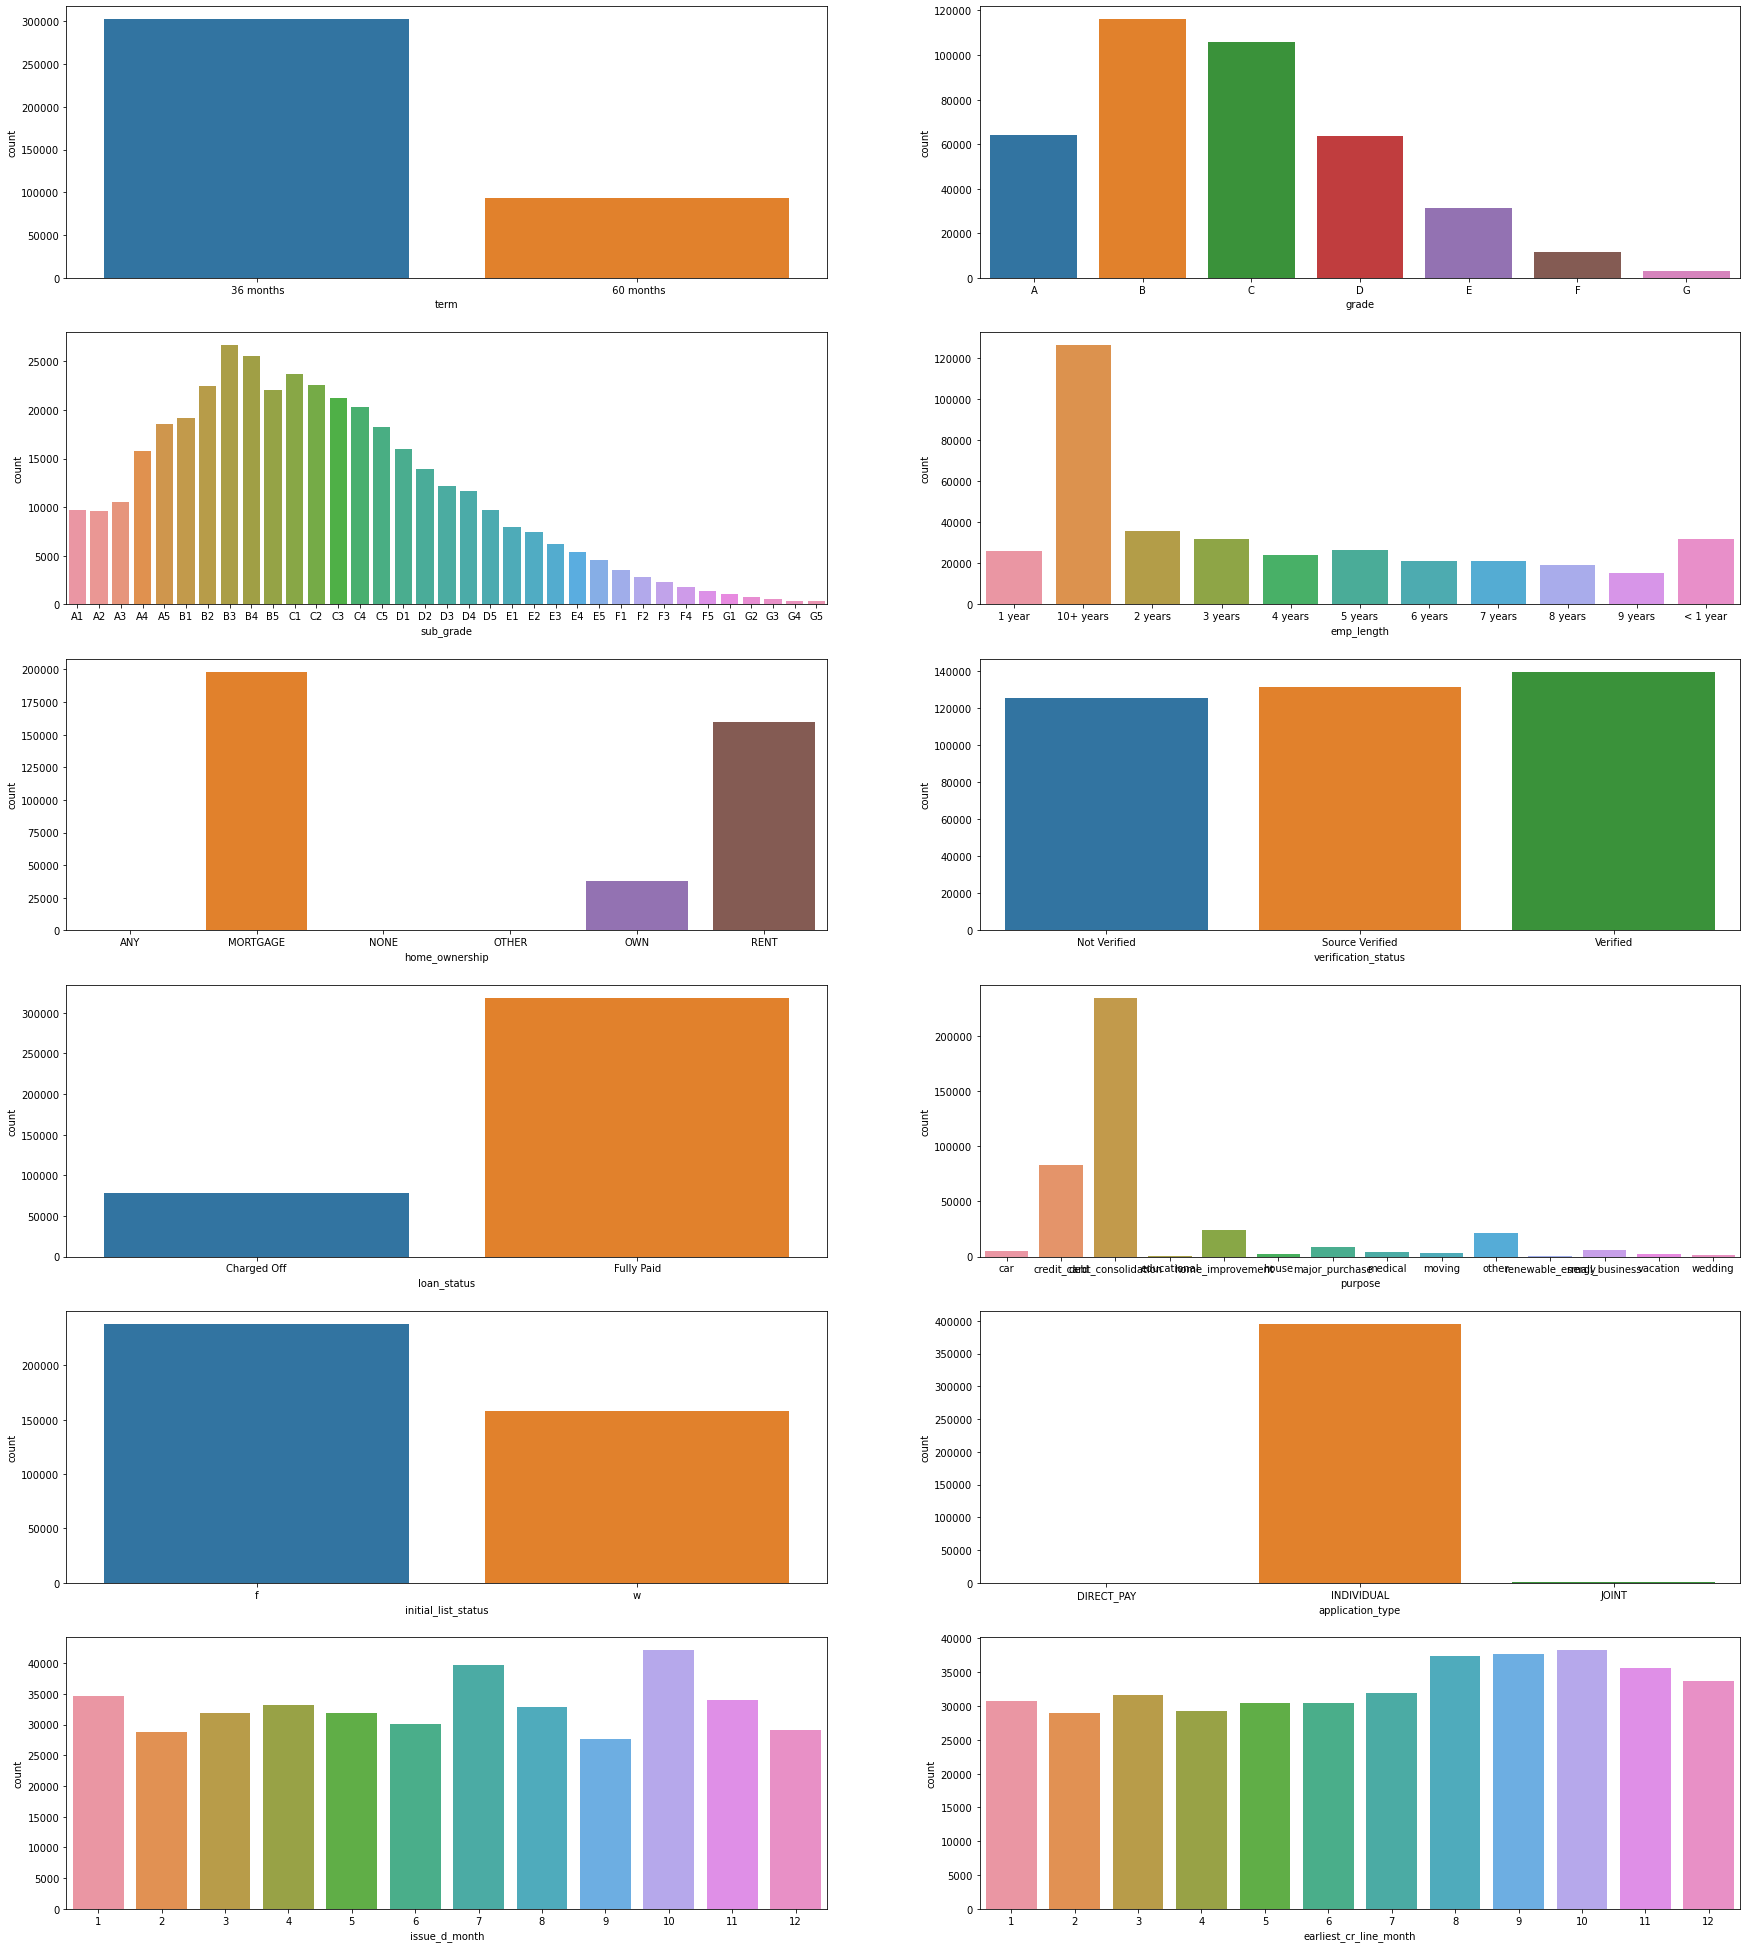

In [ ]:
# countplot for categorical columns
fig,axes =plt.subplots(6,2,figsize=(30, 35))
cols=df_categorical_columns
for x in range(len(cols)):
    p=sns.countplot(df[cols[x]],ax=axes[x//2,x%2])

In [ ]:
# A broader look at correlation between the columns of dataframe
df_copy.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539,-0.020332,0.115067,-0.010636,-0.147003
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450,-0.002053,0.050386,-0.002673,0.108470
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628,-0.023279,0.103490,-0.010785,-0.131848
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162,-0.004875,0.050033,-0.014712,-0.140456
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558,0.000059,0.074847,0.002524,-0.009479
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732,-0.009093,0.137584,0.005477,-0.123538
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408,-0.023474,0.128452,-0.003983,-0.053268
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532,-0.002452,0.034400,-0.012220,-0.199152
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751,-0.004213,-0.053086,0.005083,-0.007452
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035,-0.007924,0.111090,0.003780,-0.278128


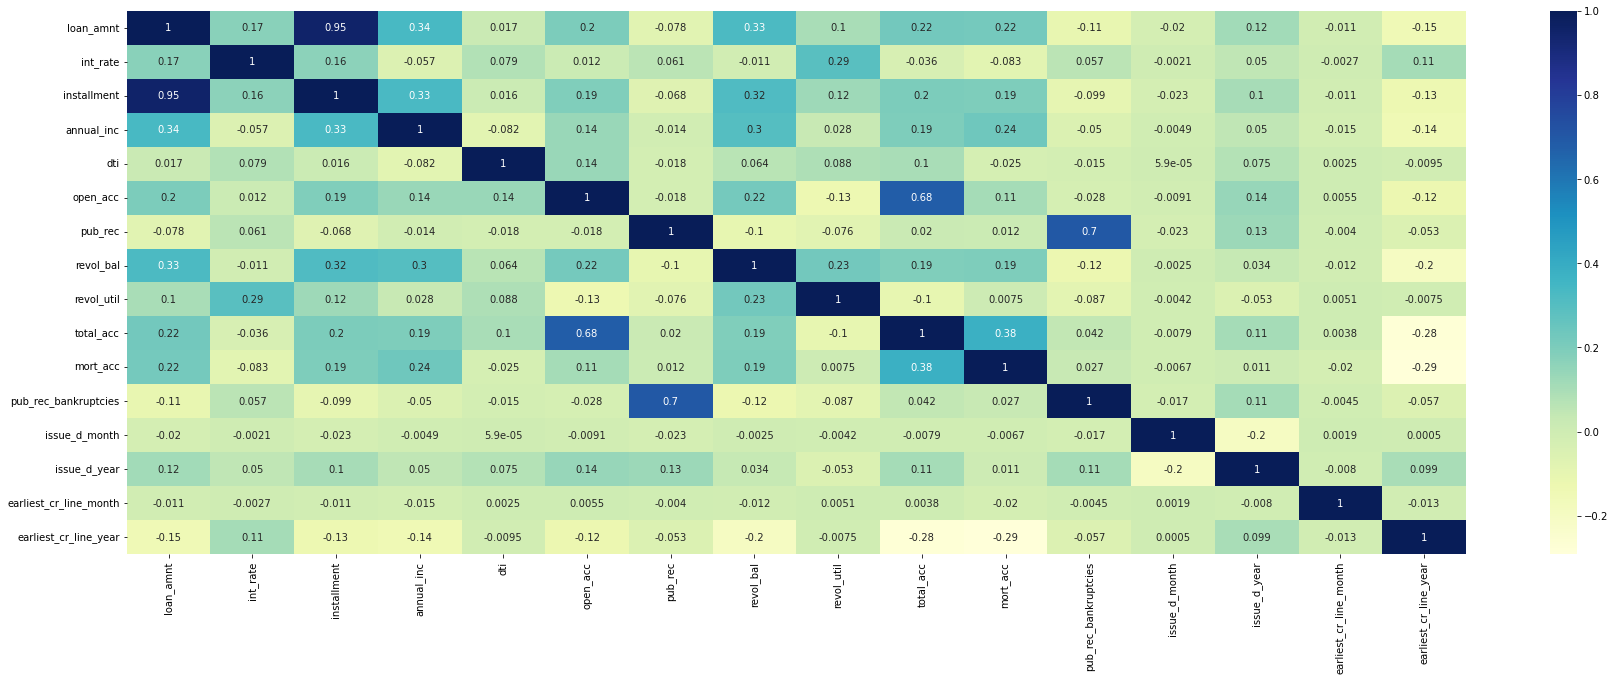

In [ ]:
# Correlation Plot above as a Heatmap -
plt.figure(figsize=(30,10))
sns.heatmap(df_copy.corr(), cmap="YlGnBu", annot=True)
plt.show()

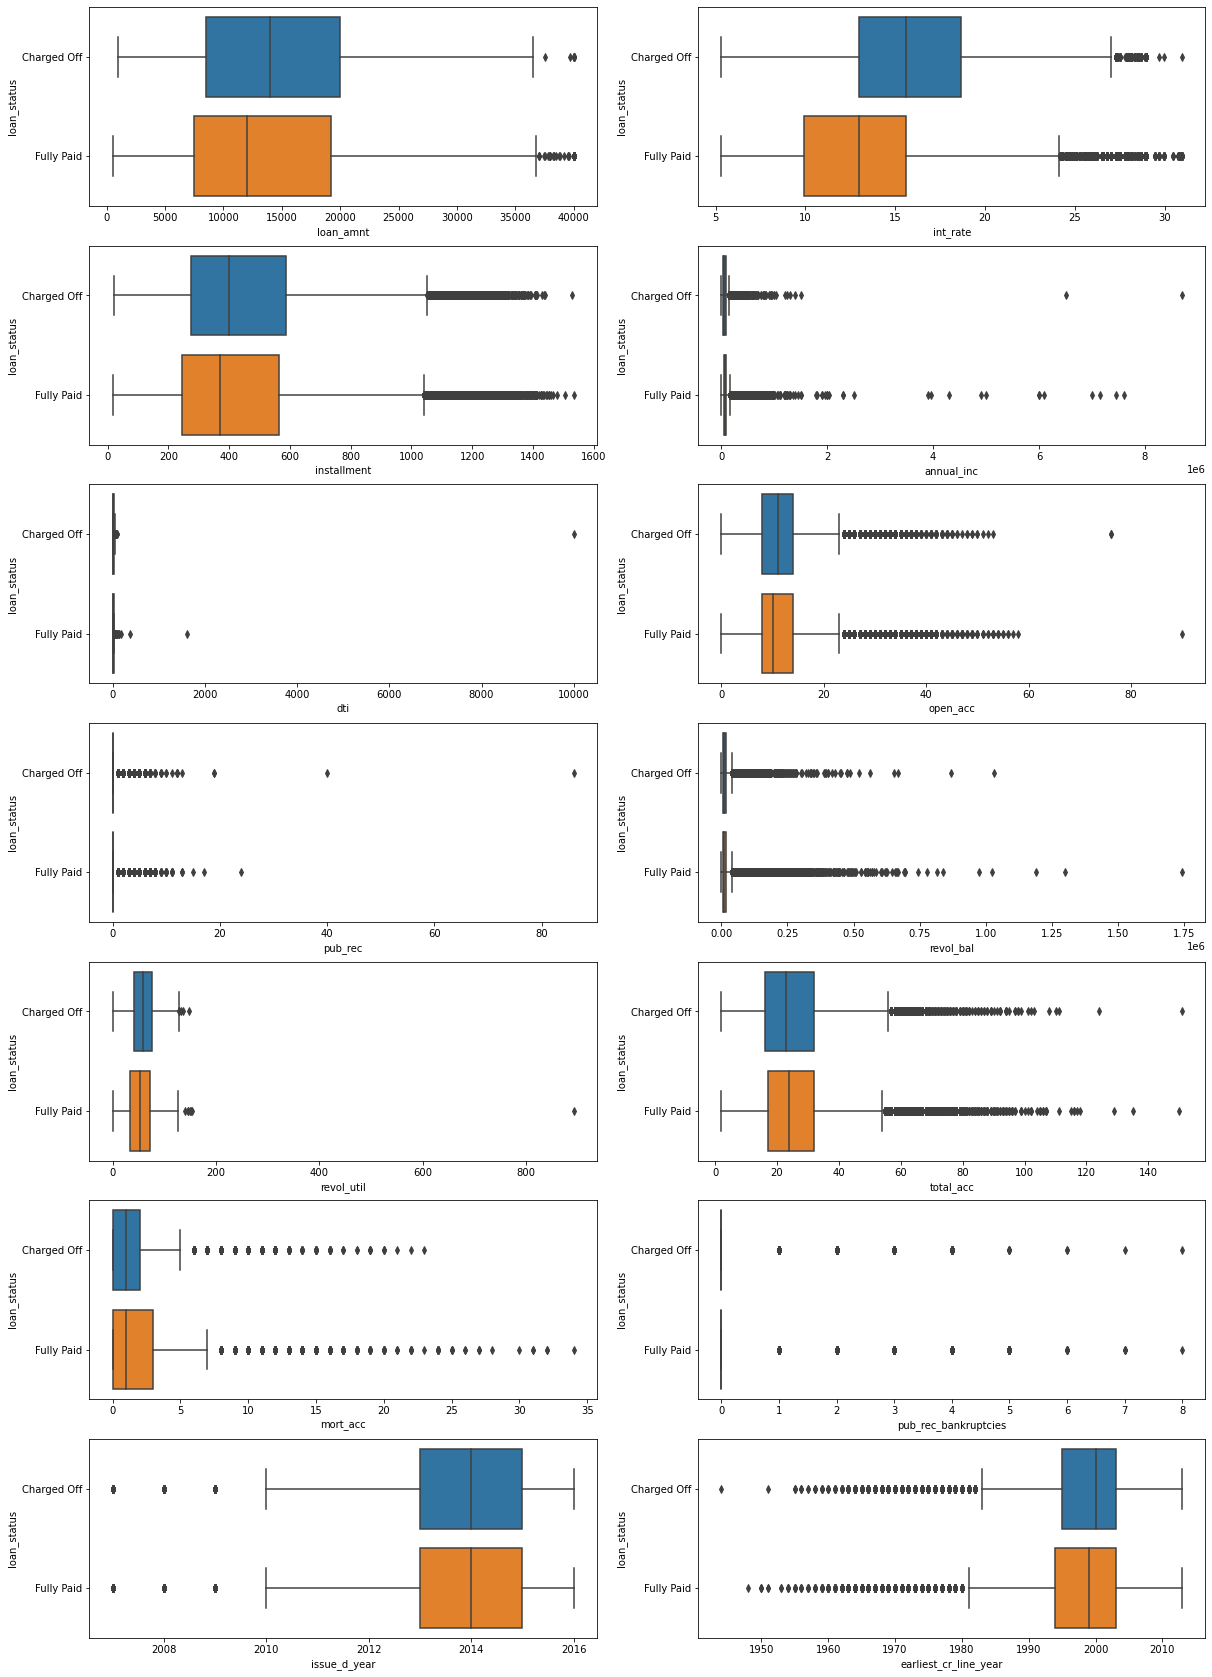

In [ ]:
#Boxplot for all continuous columns with target variable
#Outliers detetion
fig,axes =plt.subplots(7,2,figsize=(20, 30))
cols=df_continuous_columns
for x in range(len(cols)):
    p=sns.boxplot(df[cols[x]],df['loan_status'],ax=axes[x//2,x%2])

**Observations**

1) On an average people take loan of 12K to 14K.

2) The average interest rate provided to loan applicants is around 13%.

3) Monthly installment for the loan owed is mostly around 370 to 430.

4) Annual income of majority of the people lies between 65K to 75K.

5) Average number of open credit lines in the borrower's credit file are 10.

6) Average number of total credit lines currently in the borrower's credit file are 25.

7) Average number of mortgage accounts for a borrower is 1.

8) Majority of the loans were given out in the year 2014.

9) Loan amount is highly correlated to interest rate, installment, annual income, number of open credit lines, number of total credit lines and number of mortage accounts.

10) On an average people who paid the loan amount fully tends to have loan amount little smaller than the people who were charged off. The data has outliers.

11) Median interest rate for the loans which were fully paid off was less than the loans which were charged off. The data has outliers.

12) The installment amount of loan per month for both fully paid loans and charged off loans is mostly very close. The data has outliers.

13) The average annual income of the people who paid loans fully is more than the people who were unable to pay the loan. The data has outliers.

14) The average number of open credit lines, average number of total credit lines and average number of mortage accounts are very close for the fully paid loan borrowers and charged off loan borrowers. The data has outliers.

15) Most number of fully paid loans as well as charged off loans were issued in the year 2014. The data has outliers.

### Duplicate value check

In [ ]:
# Checking for duplicate rows
df.duplicated().sum()

0

There are no no duplicate rows in the dataset.

### Missing value treatment

In [ ]:
#Checking which columns have null values
df.isnull().sum()

loan_amnt                     0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                 22927
emp_length                18301
home_ownership                0
annual_inc                    0
verification_status           0
loan_status                   0
purpose                       0
title                      1755
dti                           0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                  276
total_acc                     0
initial_list_status           0
application_type              0
mort_acc                  37795
pub_rec_bankruptcies        535
address                       0
issue_d_month                 0
issue_d_year                  0
earliest_cr_line_month        0
earliest_cr_line_year         0
dtype: int64

In [ ]:
# imputing missing values
df['revol_util']= df['revol_util'].fillna(df['revol_util'].median())
df['mort_acc']= df['mort_acc'].fillna(df['mort_acc'].median())
df['pub_rec_bankruptcies']= df['pub_rec_bankruptcies'].fillna(df['pub_rec_bankruptcies'].median())
df['emp_title'] = df['emp_title'].fillna(df['emp_title'].mode()[0])
df['emp_length'] = df['emp_length'].fillna(df['emp_length'].mode()[0])
df['title'] = df['title'].fillna(df['title'].mode()[0])

Missing values are filled with median for continuous variables and mode for categorical or object variables.

In [ ]:
#Checking again which columns have null values
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_title                 0
emp_length                0
home_ownership            0
annual_inc                0
verification_status       0
loan_status               0
purpose                   0
title                     0
dti                       0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util                0
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies      0
address                   0
issue_d_month             0
issue_d_year              0
earliest_cr_line_month    0
earliest_cr_line_year     0
dtype: int64

### Outlier treatment

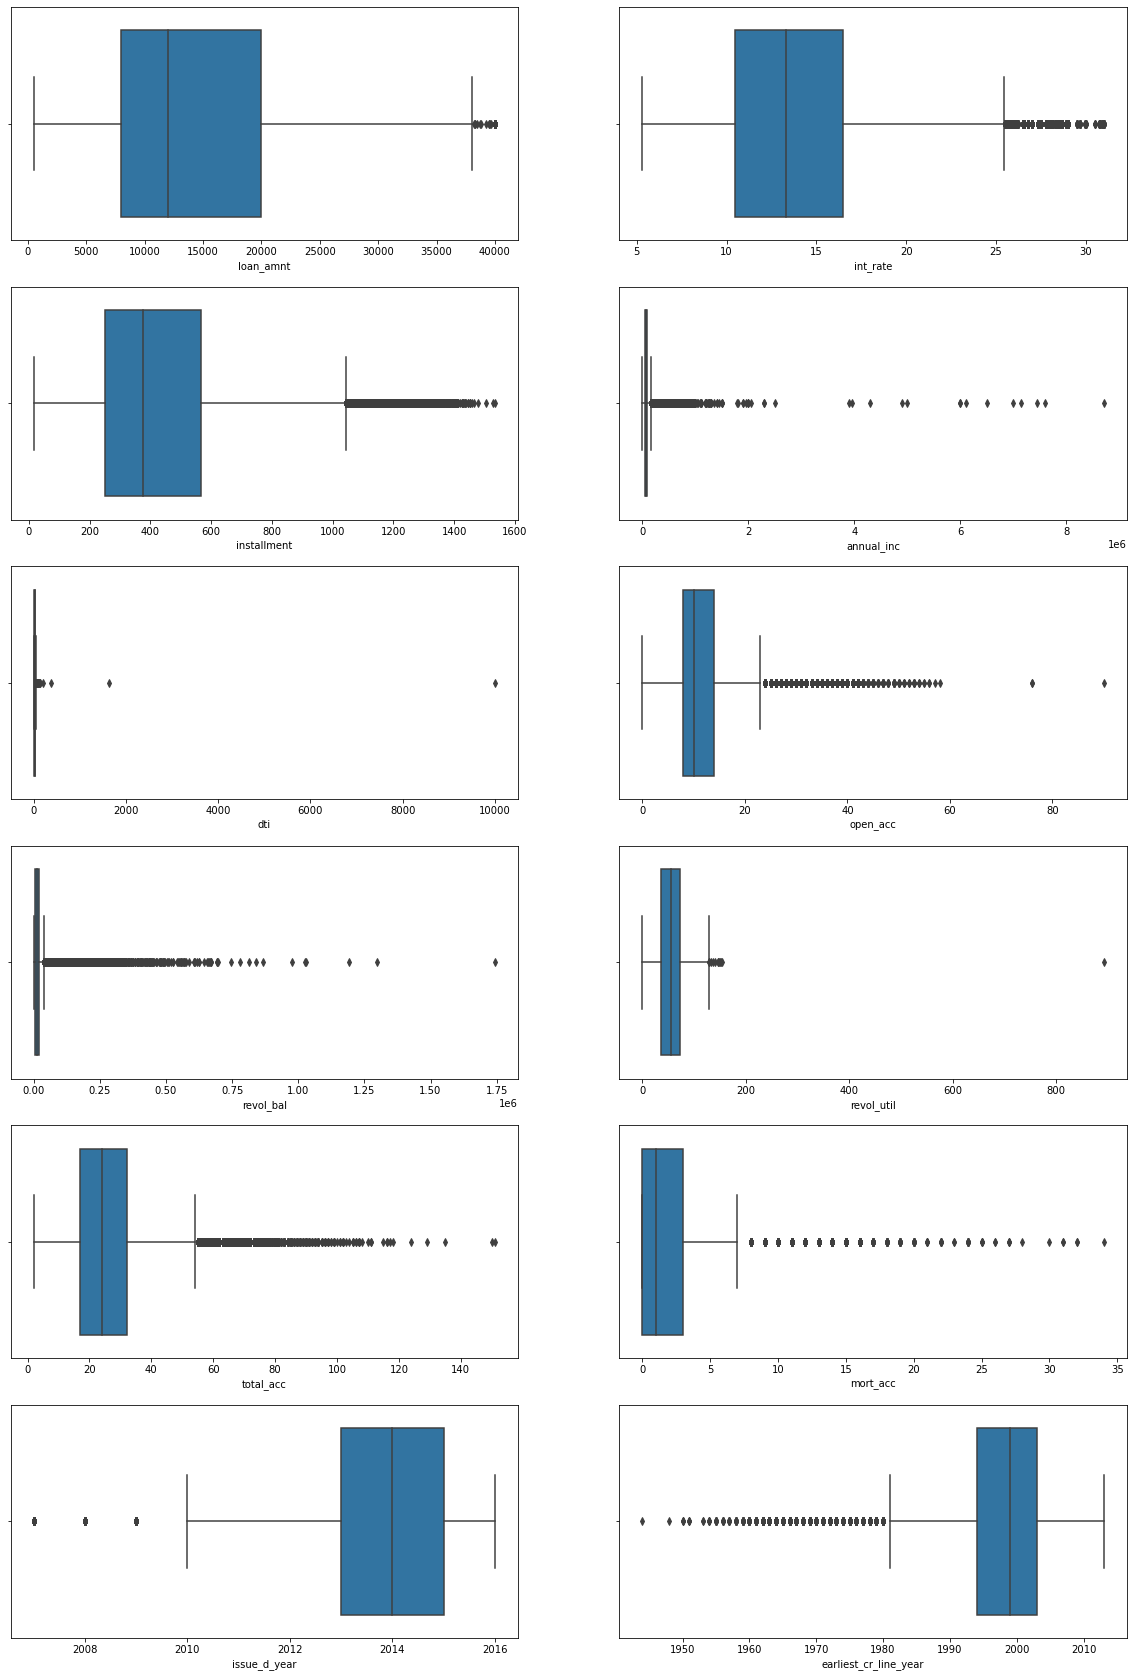

In [ ]:
#Boxplot for all continuous variables
#Outliers detetion
fig,axes =plt.subplots(6,2,figsize=(20, 30))
cols=['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'issue_d_year', 'earliest_cr_line_year']
for x in range(len(cols)):
    sns.boxplot(df[cols[x]],ax=axes[x//2,x%2])

In [ ]:
# function to treat outliers using IQR method
def outliers_treatment_iqr(dataf,col_list):
    for i in col_list:
        Q1 = np.percentile(dataf[i], 25, interpolation = 'midpoint')
        Q3 = np.percentile(dataf[i], 75, interpolation = 'midpoint')
        IQR = Q3 - Q1
        dataf=dataf[(dataf[i]>=(Q1 - 1.5 * IQR)) & (dataf[i]< (Q3 + 1.5 * IQR))]
    return dataf

In [ ]:
# Outliers treatment for dataframe df using IQR method
cols=['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'issue_d_year', 'earliest_cr_line_year']
df=outliers_treatment_iqr(df,cols)
df.reset_index(inplace=True,drop=True)

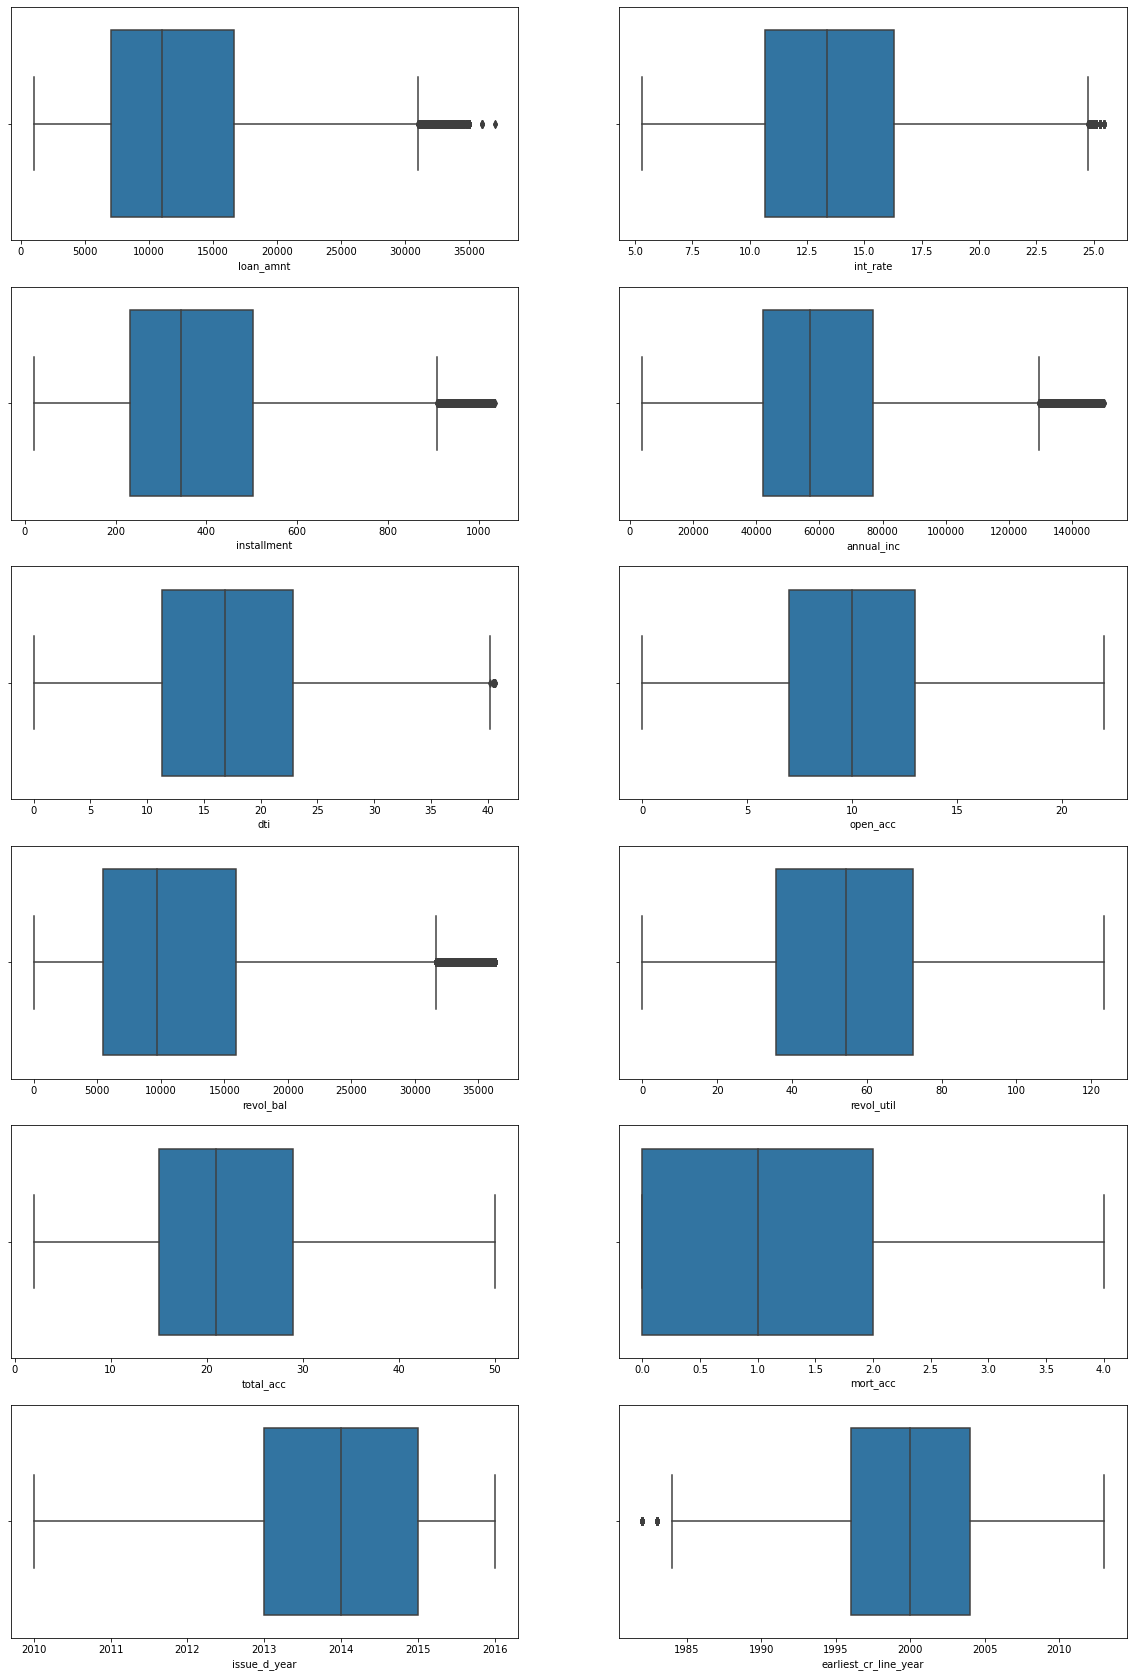

In [ ]:
#Boxplot for all continuous variables
#Outliers detetion
fig,axes =plt.subplots(6,2,figsize=(20, 30))
cols=['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'issue_d_year', 'earliest_cr_line_year']
for x in range(len(cols)):
    sns.boxplot(df[cols[x]],ax=axes[x//2,x%2])

### Feature engineering

In [ ]:
# creating flags for necessary columns
df['pub_rec_flag'] =  np.where(df['pub_rec']>1, 1, 0)
df['mort_acc_flag'] =  np.where(df['mort_acc']>1, 1, 0)
df['pub_rec_bankruptcies_flag'] =  np.where(df['pub_rec_bankruptcies']>1, 1, 0)
df.drop(['pub_rec','mort_acc','pub_rec_bankruptcies'],axis=1,inplace=True)

In [ ]:
# converting categorical variables to numerical variables using encoding
df = pd.get_dummies(df, columns=['term','grade','sub_grade','emp_length','home_ownership','verification_status','purpose','initial_list_status','application_type','issue_d_month','earliest_cr_line_month'], drop_first=True)

In [ ]:
#removing object variables from dataset
df.drop(['emp_title','title','address'], axis=1, inplace=True)

In [ ]:
# changing target variable into numerical values - [1,0]
df['loan_status'].replace(to_replace = 'Fully Paid', value =1, inplace=True)
df['loan_status'].replace(to_replace = 'Charged Off', value =0, inplace=True)
df['loan_status'] = df['loan_status'].astype('int')

### Data preparation for modeling


In [ ]:
# creating x and y dataframes
x = df.copy()
x.drop(['loan_status'],axis=1,inplace=True)
y=df['loan_status']

In [ ]:
# splitting the dataset into training and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

In [ ]:
# standardizing the training and test data
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

### Model building

In [ ]:
# creation of the Logistic regression model
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
# prediction on the test data
y_pred = classifier.predict(X_test)

In [ ]:
# name of columns along with their coeffcients
odds = np.exp(classifier.coef_[0])
clg_coef = pd.DataFrame(odds, x.columns, columns=['coef']).sort_values(by='coef', ascending=False)
clg_coef

,coef
int_rate,1.504618
annual_inc,1.238233
total_acc,1.099135
revol_bal,1.080222
home_ownership_MORTGAGE,1.056809
...,...
grade_F,0.715425
grade_B,0.623356
grade_E,0.600758
grade_D,0.533302


The logistic regression coefficients shows the log odds of the query datapoint to be in the target class based on the features. So, one has to convert them to normal odds to understand them better.

In [ ]:
# intercept of the model
classifier.intercept_

array([1.5726353])

In [ ]:
# accuracy of the model
classifier.score(X_test,y_test)

0.8018871203169528

**Observation**

As per the model, multiple columns influence the decision of giving or not giving a loan to an applicant but top 3 of them are - interest rate, annual income of the applicant and total number of credit lines of the borrower. The intercept derived from the model is 1.6 . Accuracy of the model came out to be 80% which can be further increased by hyperparameter tuning.

### ROC AUC Curve

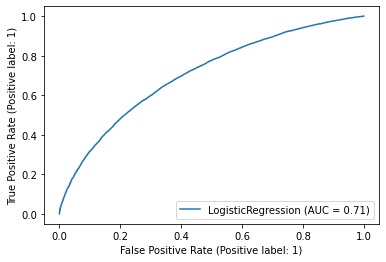

In [ ]:
metrics.plot_roc_curve(classifier, X_test, y_test)

The ROC AUC score is 0.71 and ROC AUC curve can be seen above. This score can be further improved by hyperparamter tuning. The score and model suggests that this model is better than any average or mean model. This shows that model will provide more True Positives which is required by any classification problem.

### Precision Recall Curve

In [ ]:
# precision score
metrics.precision_score(y_test,y_pred)

0.8082959641255605

In [ ]:
# recall score
metrics.recall_score(y_test,y_pred)

0.9863629454300666

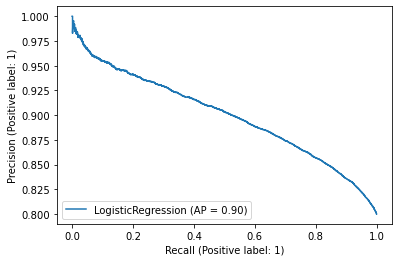

In [ ]:
# precision recall curve
metrics.plot_precision_recall_curve(classifier, X_test, y_test)

The precision score for the model is 0.81 and recall score is 0.99 . Both the scores are high which is pretty good with respect to the model. The precision recall curve is shown above. The curve shows that model is behaving as desired giving out high precision and high recall against multiple threshold values. The average precision is 0.90 .

### Classification Report

In [ ]:
target_names = ['Charged Off', 'Fully Paid']
print(metrics.classification_report(y_test, y_pred,target_names=target_names))

              precision    recall  f1-score   support

 Charged Off       0.54      0.06      0.11     11497
  Fully Paid       0.81      0.99      0.89     46051

    accuracy                           0.80     57548
   macro avg       0.67      0.52      0.50     57548
weighted avg       0.75      0.80      0.73     57548



In [ ]:
# confusion matrix
metrics.confusion_matrix(y_test, y_pred)

array([[  724, 10773],
       [  628, 45423]])

The confusion matrix shows -

1) TP (True Positive) = 45423

2) FP (False Positive) = 10773

3) TN (True Negative) = 724

4) FN (False Negative) = 628

### Q) How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.

To improve any model, all the necessary steps have to be taken care at the time of training it. So,the steps which can be taken to increase Specificity and Precision in our model are -

-> Have more balanced data rather than imbalanced data. We can use techniques like SMOTE, Oversampling or Undersampling to create balanced data.

-> Impute null values and treat outliers as both of the can majorly impact the outcome of the model.

-> Standardization of the training data is important before model training so that all the features can be comparable.

-> Creation of new features out of existing one based on business logic, domain knowledge as well as EDA.

-> Hyperparameter tuning is realy important to get the most efficient model.

### Q) Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone.

This is a major issue in any banking institution. But simply because of NPA, they can't stop disbursing loans. But if precision is increased of the classification model as well as the minimization of false negatives than the institution can get confidence to issue loans more efficiently and precisely. Adjustment of threshold value while model training can highly improve the model precision and reduce false negatives as well. To minimize False Negatives, a model can be retrained on the same data with slightly different output values that are more relevant to its prior findings. With this approach, a model is trained on a dataset until it achieves a global minimum in the best possible way.

### Actionable Insights & Recommendations

1) LoanTap needs to gather more data and make their tarining data more balanced for their classifier to work efficiently.

2) They should continuously try to increase Precision as well as Recall to detect defaulters and issue loans to the right customers.

3) The company should roll out concession on their interest rates from time to time to engage their customers to take more loans from them.

4) The company should decide on issuing of loans to the customers who are near to threshold value based on the relevant parameters decided by the campany as this can go in both ways in future where the persom may not be able to repay or he may be able to repay on time.

5) They can send out offers to existing customers on their monthly installments to get their customers pay installments on time which will inturn help the company to grow.

6) The documentation charges as well as processing fees can be decreased seasonly to attract new customers for the company.

7) Since the outcome of issuing a loan to a customer depends majorly on factors like interest rate of the loan, annual income of the borrower, total number of credit lines of the customer, total credit revolving balance and loan amount applied, the company should maintain proper tools and means to get all this relevant information effectively.

8) To stand out in the market, company should roll out policies for the defaulters and rewards for the customers who full pay off their loans.